<a href="https://colab.research.google.com/github/ShirinYousaf/Newyork-Real-Estate-Insights-Forecasting/blob/main/Real_Estate_EDA_%26_Forecasting_NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [ ]:
######## To read and manipulate data
import pandas as pd
import numpy as np

######## To run regressions
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

####### Various sci-kit learn functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from itertools import combinations
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Import accuracy_score
from sklearn.metrics import accuracy_score

######## For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.stats as stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Color Settings

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


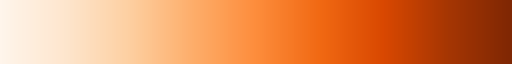

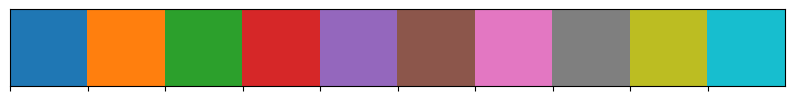

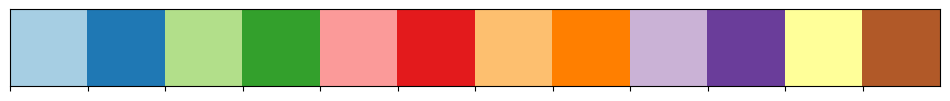

In [ ]:
palette = sns.color_palette() # Default color palette
print(palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(palette) # Plotting your palette!
pairpalette = sns.color_palette('Paired')
sns.palplot(pairpalette) # Seaborn color palette, with 10 colors
sns.color_palette("Oranges", as_cmap=True) # Get a CMap

In [ ]:
# Convert RGB tuples to hex
hex_colors = [mcolors.to_hex(color) for color in sns.color_palette('Paired')]
print(hex_colors)

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']


## Question 1: Summary Statistics

### Read Files

In [ ]:
# The file path starts from the same location of this notebook
file_path = 'realtor-data-ny.csv'
df = pd.read_csv(file_path)

### 1. Data Cleaning

**First, look at the data**

In [ ]:
# Create the 'prev_sold' variable as a explanation for entries with their 'prev_sold_date' variable missing. This shows whether a house had been previously sold.
df['is_prev_sold'] = df['prev_sold_date'].notnull().astype(int)

In [ ]:
# Create the log transformed 'price' variable, 'log_price' for better relative comparison, since entires are spread across different geographic locations, with exceptional anomalies displayed in New York City.
df['log_price'] = np.log(df['price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388925 entries, 0 to 388924
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          84040 non-null   object 
 1   bed             84040 non-null   float64
 2   bath            83946 non-null   float64
 3   acre_lot        84040 non-null   float64
 4   city            84038 non-null   object 
 5   state           84040 non-null   object 
 6   zip_code        84036 non-null   float64
 7   house_size      84040 non-null   float64
 8   prev_sold_date  56605 non-null   object 
 9   price           84040 non-null   float64
 10  nyc             84040 non-null   object 
 11  is_prev_sold    388925 non-null  int64  
 12  log_price       84040 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 38.6+ MB


In [ ]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,nyc,is_prev_sold,log_price
0,for_sale,3.0,1.0,0.37,Accord,New York,12404.0,960.0,21/03/2022,249900.0,No,1,12.428816
1,for_sale,3.0,2.0,0.38,Accord,New York,12404.0,1936.0,06/01/1989,319000.0,No,1,12.672946
2,for_sale,2.0,1.0,0.41,Accord,New York,12404.0,832.0,10/09/2015,169500.0,No,1,12.040608
3,for_sale,3.0,1.0,5.50,Accord,New York,12404.0,1900.0,NaN,695000.0,No,0,13.451667
4,for_sale,3.0,3.0,6.50,Accord,New York,12404.0,4000.0,30/07/2021,250000.0,No,1,12.429216


In [ ]:
df.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,nyc,is_prev_sold,log_price
388920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
388921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
388922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
388923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
388924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price,is_prev_sold,log_price
count,84040.000000,83946.000000,84040.000000,84036.000000,84040.000000,8.404000e+04,388925.000000,84040.000000
mean,3.930200,2.980690,10.624121,10983.073409,2472.279938,1.274604e+06,0.145542,13.612734
std,2.062923,1.756449,849.058032,688.870753,2326.090138,2.312462e+06,0.352647,0.836738
min,1.000000,1.000000,0.000000,6390.000000,122.000000,2.000000e+04,0.000000,9.903488
25%,3.000000,2.000000,0.060000,10514.000000,1370.000000,5.280000e+05,0.000000,13.176852
50%,4.000000,3.000000,0.140000,10916.000000,2000.000000,7.545000e+05,0.000000,13.533811
75%,5.000000,4.000000,0.570000,11233.000000,2880.000000,1.220000e+06,0.000000,14.014361
max,42.000000,43.000000,100000.000000,14534.000000,112714.000000,1.690000e+08,1.000000,18.945409


In [ ]:
df.isnull().sum()

,0
status,304885
bed,304885
bath,304979
acre_lot,304885
city,304887
state,304885
zip_code,304889
house_size,304885
prev_sold_date,332320
price,304885


For the records that are missing 'Prev_sold_data', we decided that it just means there's no record that the property's been sold. It's still valid data, so we kept them.

### 1.1 distribution of categorical variables

In [ ]:
# List of variables to analyze
variables = ['status', 'city', 'state', 'prev_sold_date', 'is_prev_sold', 'nyc']
# Loop through variables and display value counts
for col in variables:
    print(f"Distribution of values for {col}:")
    print(df[col].value_counts())
    print("\n")

Distribution of values for status:
status
for_sale    84040
Name: count, dtype: int64


Distribution of values for city:
city
New York City     8338
Staten Island     7073
Brooklyn          6535
Bronx             6424
Yonkers           2321
                  ... 
Godeffroy            1
Grahamsville         1
Northport            1
Hewlett Harbor       1
Staatsburg           1
Name: count, Length: 457, dtype: int64


Distribution of values for state:
state
New York    84040
Name: count, dtype: int64


Distribution of values for prev_sold_date:
prev_sold_date
04/11/2003    134
05/11/2021    104
21/06/2017     81
03/10/2013     77
06/09/2005     73
             ... 
20/03/2008      1
10/07/1998      1
12/07/2017      1
11/07/2006      1
21/03/2022      1
Name: count, Length: 4267, dtype: int64


Distribution of values for is_prev_sold:
is_prev_sold
0    332320
1     56605
Name: count, dtype: int64


Distribution of values for nyc:
nyc
No     61936
Yes    22104
Name: count, dtype: int64




### 1.2 Distribution of continuous variables

                bed          bath       acre_lot     house_size         price  \
count  84040.000000  83946.000000   84040.000000   84040.000000  8.404000e+04   
mean       3.930200      2.980690      10.624121    2472.279938  1.274604e+06   
std        2.062923      1.756449     849.058032    2326.090138  2.312462e+06   
min        1.000000      1.000000       0.000000     122.000000  2.000000e+04   
25%        3.000000      2.000000       0.060000    1370.000000  5.280000e+05   
50%        4.000000      3.000000       0.140000    2000.000000  7.545000e+05   
75%        5.000000      4.000000       0.570000    2880.000000  1.220000e+06   
max       42.000000     43.000000  100000.000000  112714.000000  1.690000e+08   

          log_price  
count  84040.000000  
mean      13.612734  
std        0.836738  
min        9.903488  
25%       13.176852  
50%       13.533811  
75%       14.014361  
max       18.945409  


array([[<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'house_size'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log_price'}>]], dtype=object)

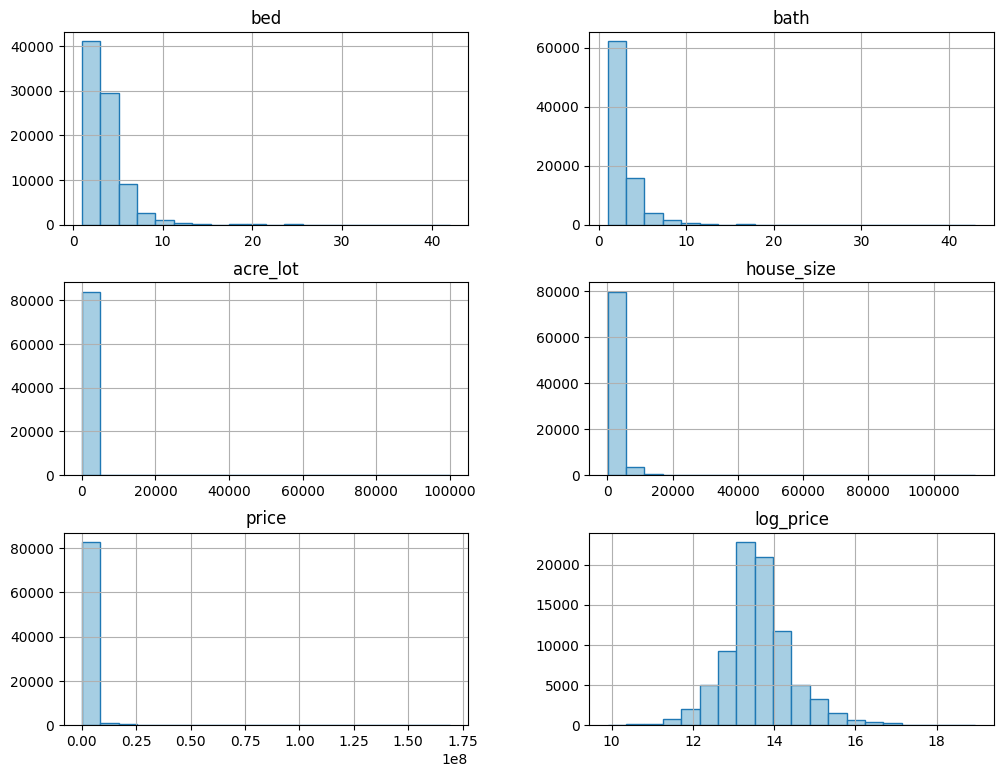

In [ ]:
# List of columns for which to plot histograms
columns_to_plot = ['bed', 'bath', 'acre_lot', 'house_size', 'price', 'log_price']
print(df[columns_to_plot].describe())
# Plot histograms for the specified columns
df[columns_to_plot].hist(figsize=(12, 9), bins=20, color=pairpalette[0],edgecolor=pairpalette[1])

**Remove Outliers**

In [ ]:
# Apply all filtering conditions at once
cdf = df[
    (df['bed'] <= 15) &
    (df['bath'] <= 15) &
    (df['acre_lot'] <= 2) &
    (df['house_size'] <= 20000) &
    (df['price'] <= 8000000)
]

# Check the resulting data
print(cdf.describe())

                bed          bath      acre_lot      zip_code    house_size  \
count  74005.000000  74005.000000  74005.000000  74001.000000  74005.000000   
mean       3.882724      2.829836      0.294322  10968.352806   2221.820107   
std        1.849067      1.418526      0.392463    654.365575   1283.951529   
min        1.000000      1.000000      0.000000   6390.000000    122.000000   
25%        3.000000      2.000000      0.060000  10512.000000   1360.000000   
50%        4.000000      3.000000      0.110000  10923.000000   1950.000000   
75%        5.000000      3.000000      0.360000  11233.000000   2713.000000   
max       14.000000     15.000000      2.000000  14534.000000  15000.000000   

              price  is_prev_sold     log_price  
count  7.400500e+04  74005.000000  74005.000000  
mean   1.033275e+06      0.682805     13.567891  
std    9.643704e+05      0.465387      0.731436  
min    2.000000e+04      0.000000      9.903488  
25%    5.390000e+05      0.000000     

array([[<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'house_size'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log_price'}>]], dtype=object)

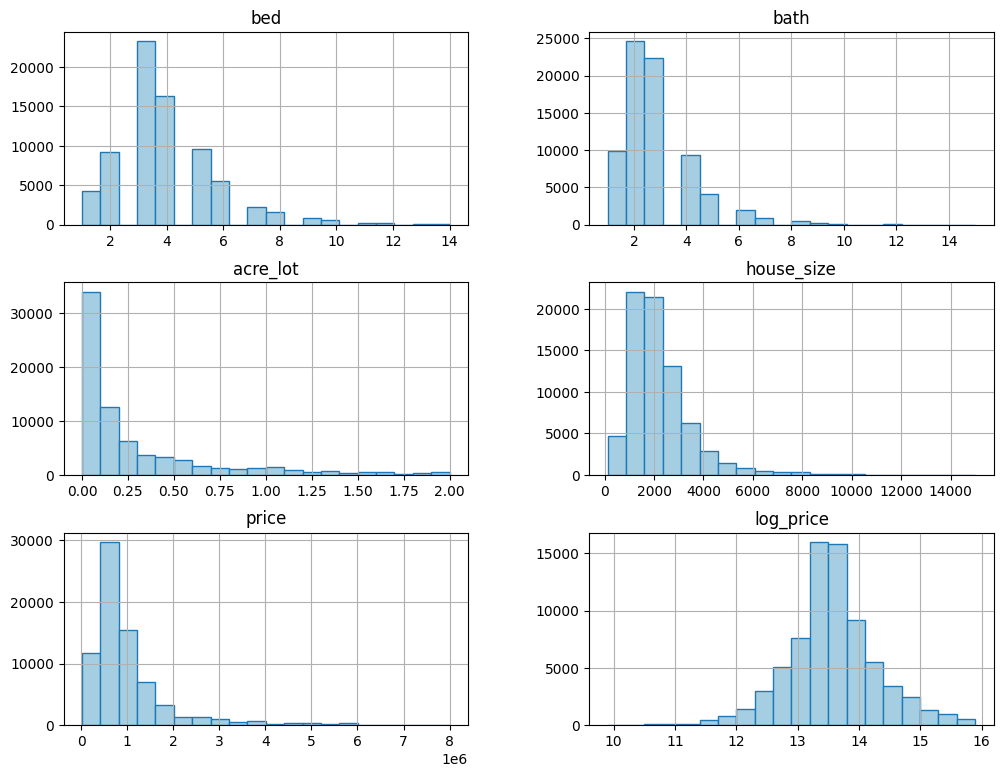

In [ ]:
# Plot cleaned data
cdf[columns_to_plot].hist(figsize=(12,9), color=pairpalette[0], bins=20, edgecolor=pairpalette[1])

### 2. House Features - Price

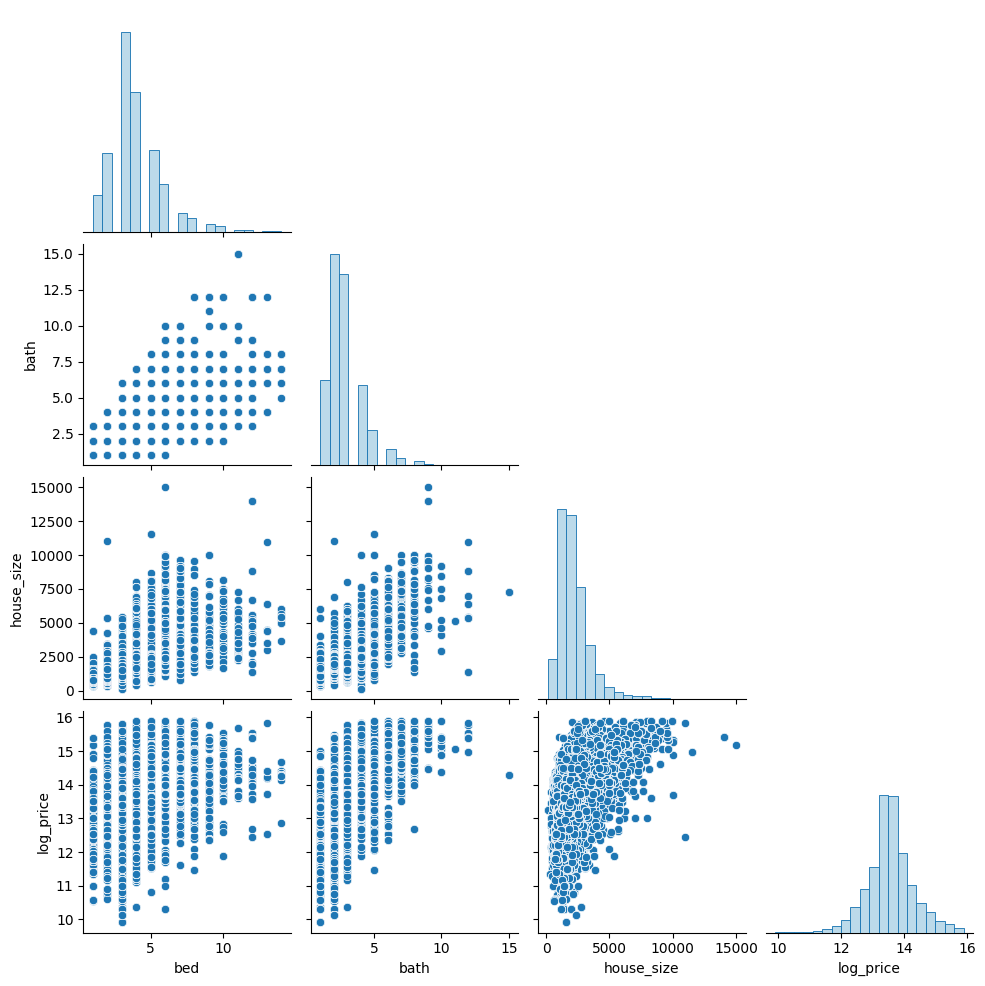

In [ ]:
sns.pairplot(cdf[['bed', 'bath','house_size', 'log_price']], corner=True, diag_kind='hist',
             diag_kws={'bins': 20, 'edgecolor': pairpalette[1], 'color': pairpalette[0]})
plt.show()

### 3. Geo Location vs. Price

### 3.1 Top 10 Cities with highest average price

<Axes: title={'center': 'Top 10 Cities with Highest Average Price'}, xlabel='City', ylabel='Average Price'>

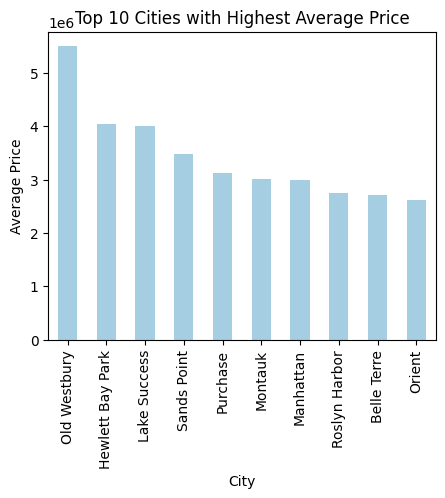

In [ ]:
# Group by 'city' and calculate the mean 'price"
avg_price_by_city = cdf.groupby('city')['price'].mean()

# Sort the results by average price, in descending order
sorted_avg_price_by_city = avg_price_by_city.sort_values(ascending=False)

# Select the top 10 cities
top_10_avg_price_by_city = sorted_avg_price_by_city.head(10)

top_10_avg_price_by_city.plot(kind='bar', figsize=(5, 4), color=pairpalette[0], title='Top 10 Cities with Highest Average Price', xlabel='City', ylabel='Average Price')

### 3.2 Top 10 Cities with Most Properties for Sale

<Axes: title={'center': 'Top 10 Cities with Most Properties for Sale'}, xlabel='city'>

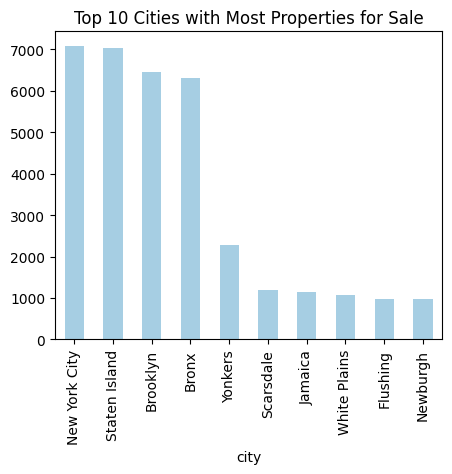

In [ ]:
cdf['city'].value_counts().head(10).plot(kind='bar', figsize=(5,4), color=pairpalette[0], title='Top 10 Cities with Most Properties for Sale')

### 3.3 NYC vs. Non-NYC

In [ ]:
print(cdf['nyc'].value_counts())

nyc
No     53294
Yes    20711
Name: count, dtype: int64


<Axes: title={'center': 'Number of Properties: NYC vs Non-NYC'}, ylabel='count'>

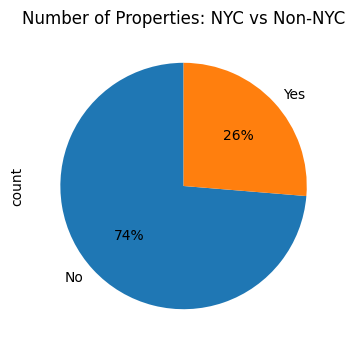

In [ ]:
df['nyc'].value_counts().plot(kind='pie', figsize=(5, 4), autopct='%1.0f%%', startangle=90, color=[pairpalette[1], pairpalette[7]], title='Number of Properties: NYC vs Non-NYC')

Text(0, 0.5, 'Price(Log Scale)')

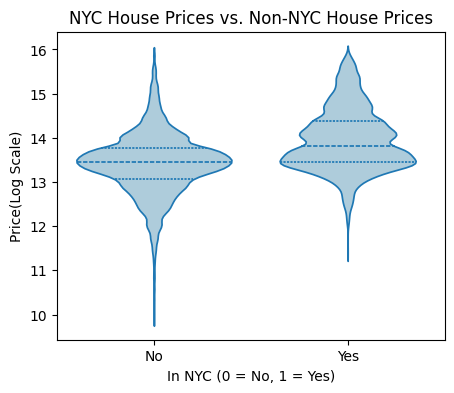

In [ ]:
# Create a violin plot
plt.figure(figsize=(5,4))
sns.violinplot(x='nyc', y='log_price', data=cdf, inner='quartile',edgecolor=pairpalette[1],color=pairpalette[0])
plt.title('NYC House Prices vs. Non-NYC House Prices')
plt.xlabel('In NYC (0 = No, 1 = Yes)')
plt.ylabel('Price(Log Scale)')

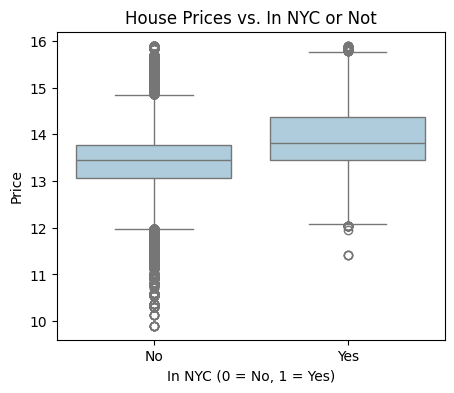

In [ ]:
# Create a box plot
plt.figure(figsize=(5,4))
sns.boxplot(x='nyc', y='log_price', data=cdf,color=pairpalette[0])
plt.title('House Prices vs. In NYC or Not')
plt.xlabel('In NYC (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

### 4. Status - Price

### 4.1 Properties Sold Over Time

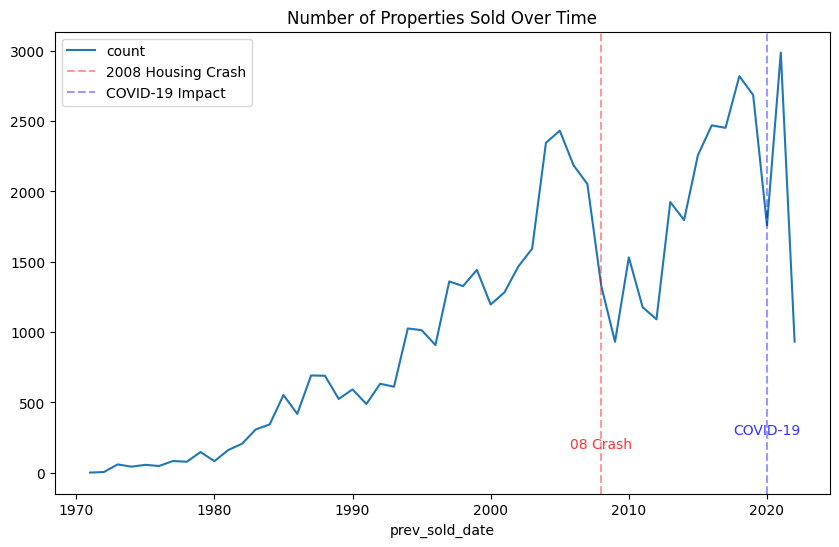

In [ ]:
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')
df['prev_sold_date'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(10,6), title='Number of Properties Sold Over Time')

# Annotations: Housing Market Crash (2008) and COVID-19 (2020)
plt.axvline(x=2008, color='red', linestyle='--', label='2008 Housing Crash', alpha=0.4)
plt.axvline(x=2020, color='blue', linestyle='--', label='COVID-19 Impact', alpha=0.4)
plt.legend()

# Adding text annotations
plt.text(2008, 200, '08 Crash', color='red', ha='center', va='center', fontsize=10, alpha=0.8)
plt.text(2020, 300, 'COVID-19', color='blue', ha='center', va='center', fontsize=10, alpha=0.8)
plt.show()

### 4.2 Is_pre_sold vs on_pre_sold

In [ ]:
print(cdf['is_prev_sold'].value_counts())

is_prev_sold
1    50531
0    23474
Name: count, dtype: int64


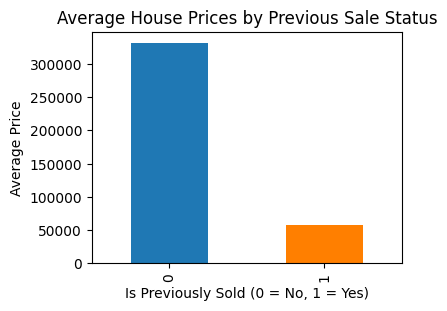

In [ ]:
df['is_prev_sold'].value_counts().plot(kind='bar', figsize=(4, 3), color=[pairpalette[1], pairpalette[7]])
plt.title('Average House Prices by Previous Sale Status')
plt.xlabel('Is Previously Sold (0 = No, 1 = Yes)')
plt.ylabel('Average Price')
plt.show()

Text(0, 0.5, 'Price')

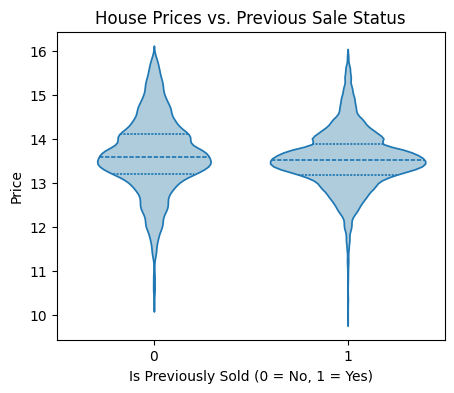

In [ ]:
# Create a violin plot
plt.figure(figsize=(5,4))
sns.violinplot(x='is_prev_sold', y='log_price', data=cdf, inner='quartile',edgecolor=pairpalette[1],color=pairpalette[0])
plt.title('House Prices vs. Previous Sale Status')
plt.xlabel('Is Previously Sold (0 = No, 1 = Yes)')
plt.ylabel('Price')

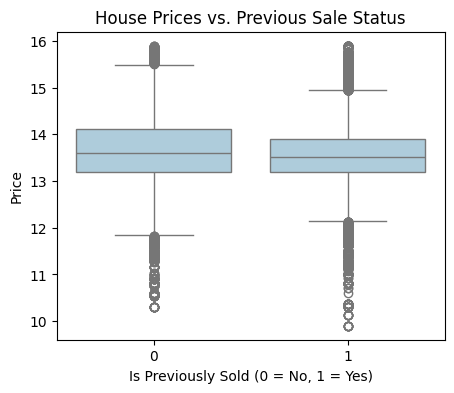

In [ ]:
# Create a box plot
plt.figure(figsize=(5,4))
sns.boxplot(x='is_prev_sold', y='log_price', data=cdf,color=pairpalette[0])
plt.title('House Prices vs. Previous Sale Status')
plt.xlabel('Is Previously Sold (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

### 5. Summary & Others

### 5.1 Summary Correlation Heatmap

<Axes: >

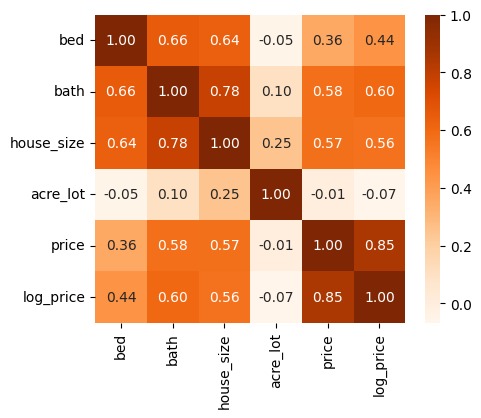

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cdf[['bed','bath','house_size','acre_lot','price','log_price']].corr(), annot=True, cmap='Oranges', fmt='.2f')

## Question 2: Regression Model

In [ ]:
model = smf.ols(formula= 'price ~ house_size+bed+bath+acre_lot+nyc', data=cdf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                 1.404e+04
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:43:27   Log-Likelihood:            -1.1001e+06
No. Observations:               74005   AIC:                         2.200e+06
Df Residuals:                   73999   BIC:                         2.200e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.803e+05   6917.582    -26.060      0.0

In [ ]:
model = smf.ols(formula= 'log_price ~ house_size+bed+bath+acre_lot+nyc', data=cdf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.535e+04
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:38:07   Log-Likelihood:                -55540.
No. Observations:               74005   AIC:                         1.111e+05
Df Residuals:                   73999   BIC:                         1.111e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5448      0.005   2444.450      0.0

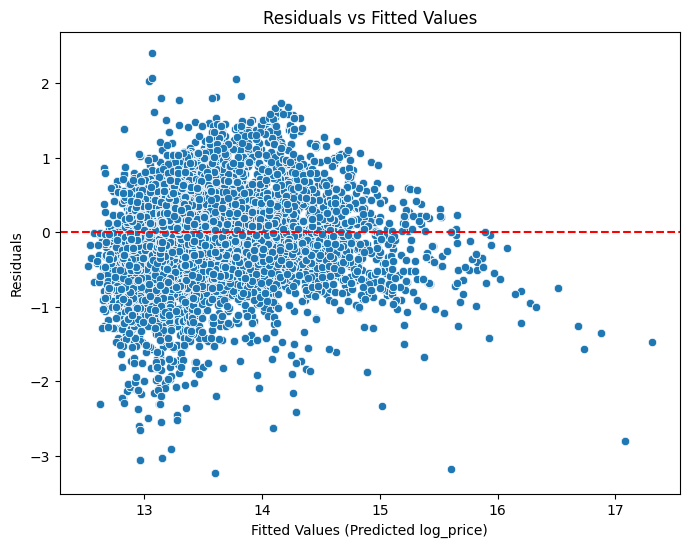

In [ ]:
# Plot residuals vs fitted values
fitted_values = model.fittedvalues  # Predicted values
residuals = model.resid  # Residuals (actual - predicted)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')  # Reference line at y=0
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted log_price)')
plt.ylabel('Residuals')
plt.show()

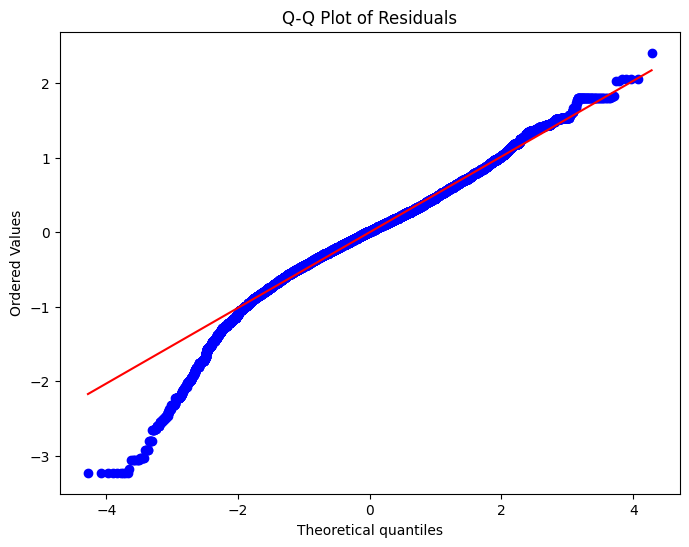

In [ ]:
# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

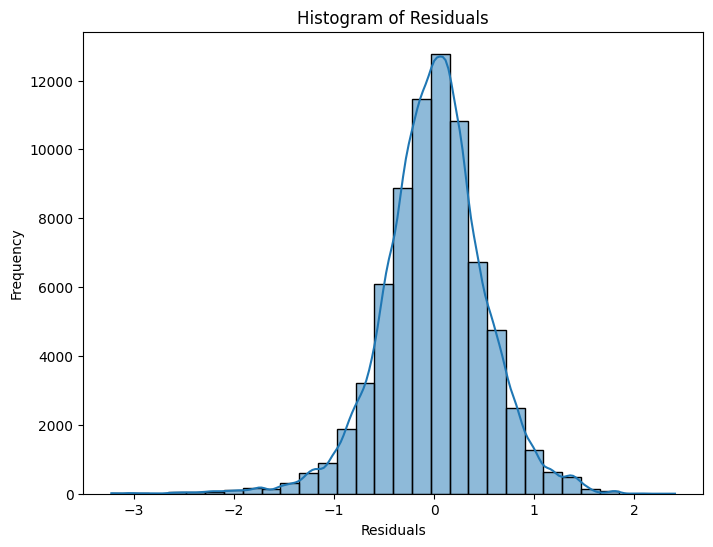

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

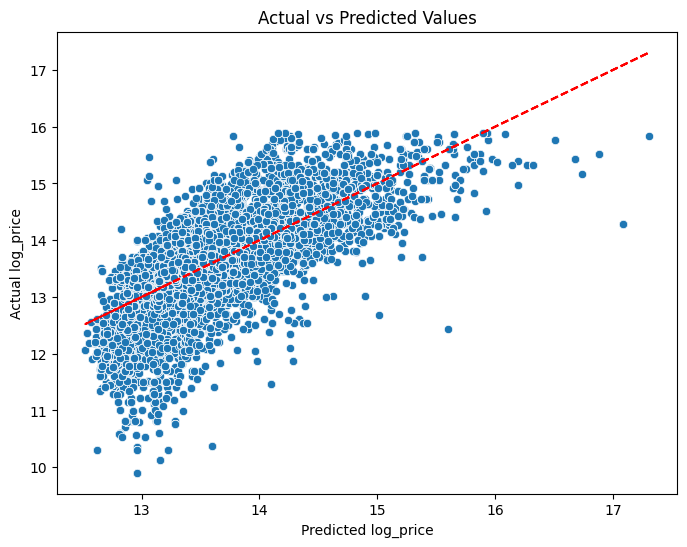

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=cdf['log_price'])
plt.plot(model.fittedvalues, model.fittedvalues, color='red', linestyle='--')  # Ideal line (y = x)
plt.title('Actual vs Predicted Values')
plt.xlabel('Predicted log_price')
plt.ylabel('Actual log_price')
plt.show()

In [ ]:
drop_dup_cdf = cdf.drop_duplicates()
model = smf.ols(formula= 'log_price ~ house_size+bed+bath+acre_lot+nyc', data=drop_dup_cdf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1545.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:49:43   Log-Likelihood:                -6693.3
No. Observations:                7928   AIC:                         1.340e+04
Df Residuals:                    7922   BIC:                         1.344e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4321      0.018    694.631      0.0

## Question 3: Classification Model

In [ ]:
# Drop rows with missing 'nyc' values
df = df.dropna(subset=['nyc'])

In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,nyc
0,for_sale,3,1.0,0.37,Accord,New York,12404.0,960,21/03/2022,249900,No
1,for_sale,3,2.0,0.38,Accord,New York,12404.0,1936,06/01/1989,319000,No
2,for_sale,2,1.0,0.41,Accord,New York,12404.0,832,10/09/2015,169500,No
3,for_sale,3,1.0,5.50,Accord,New York,12404.0,1900,NaN,695000,No
4,for_sale,3,3.0,6.50,Accord,New York,12404.0,4000,30/07/2021,250000,No


In [ ]:
df.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,nyc
84035,for_sale,3,3.0,0.65,Yulan,New York,12792.0,1480,23/05/2006,425000,No
84036,for_sale,4,1.0,1.64,Yulan,New York,12792.0,1692,20/01/2012,188500,No
84037,for_sale,4,1.0,1.64,Yulan,New York,12792.0,1692,20/01/2012,188500,No
84038,for_sale,5,2.0,0.13,NaN,New York,NaN,1925,NaN,710000,No
84039,for_sale,2,1.0,110.00,NaN,New York,12523.0,1177,NaN,495000,No


In [ ]:
# Handle missing values in numeric columns by filling with the median
numeric_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))


In [ ]:
# Encode the target variable 'nyc' (Yes -> 1, No -> 0)
le_nyc = LabelEncoder()
df['nyc'] = le_nyc.fit_transform(df['nyc'])
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,nyc
0,for_sale,3,1.0,0.37,Accord,New York,12404.0,960,21/03/2022,249900,0
1,for_sale,3,2.0,0.38,Accord,New York,12404.0,1936,06/01/1989,319000,0
2,for_sale,2,1.0,0.41,Accord,New York,12404.0,832,10/09/2015,169500,0
3,for_sale,3,1.0,5.50,Accord,New York,12404.0,1900,NaN,695000,0
4,for_sale,3,3.0,6.50,Accord,New York,12404.0,4000,30/07/2021,250000,0


In [ ]:
# Define the feature set
features = ['bed', 'bath', 'acre_lot', 'house_size', 'price']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
y = df['nyc']

In [ ]:
# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Define Stratified K-Fold cross-validation (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold cross-validation for Logistic Regression
log_reg_scores = cross_val_score(log_reg, X_scaled, y, cv=skf, scoring='accuracy')
print("Logistic Regression Stratified K-Fold Accuracy Scores:", log_reg_scores)
print(f"Logistic Regression Mean Accuracy: {np.mean(log_reg_scores):.4f}")

# Perform Stratified K-Fold cross-validation for Decision Tree
decision_tree_scores = cross_val_score(decision_tree, X_scaled, y, cv=skf, scoring='accuracy')
print("\nDecision Tree Stratified K-Fold Accuracy Scores:", decision_tree_scores)
print(f"Decision Tree Mean Accuracy: {np.mean(decision_tree_scores):.4f}")

# Perform Stratified K-Fold cross-validation for Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_scaled, y, cv=skf, scoring='accuracy')

print("\nRandom Forest Stratified K-Fold Accuracy Scores:", rf_scores)
print(f"Random Forest Mean Accuracy: {np.mean(rf_scores):.4f}")

Logistic Regression Stratified K-Fold Accuracy Scores: [0.78807711 0.78873156 0.78825559 0.78891004 0.78908853]
Logistic Regression Mean Accuracy: 0.7886

Decision Tree Stratified K-Fold Accuracy Scores: [0.99280105 0.993396   0.99303903 0.99262256 0.99113517]
Decision Tree Mean Accuracy: 0.9926

Random Forest Stratified K-Fold Accuracy Scores: [0.99369348 0.99375297 0.99393146 0.99327701 0.99440743]
Random Forest Mean Accuracy: 0.9938


In [ ]:

# Placeholder function for evaluating feature combinations
def evaluate_feature_combinations(model, X, y, features):
    best_combo = None
    best_score = 0
    for r in range(1, len(features) + 1):
        for combo in combinations(features, r):
            X_combo = X[list(combo)]
            scores = cross_val_score(model, X_combo, y, cv=5, scoring='roc_auc')
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_combo = combo
    best_model = model.fit(X[list(best_combo)], y)
    return best_combo, best_score, best_model


In [ ]:
# Convert the scaled data back to a DataFrame for easy feature selection
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

In [ ]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")


Random Forest Test Accuracy: 0.99


In [ ]:

# Placeholder for best_rf_combo and best_rf_score
best_rf_combo = features
best_rf_score = rf_accuracy
best_rf_model = rf_model


In [ ]:
# Evaluate Logistic Regression
print("Evaluating Logistic Regression...")
best_log_reg_combo, best_log_reg_score, best_log_reg_model = evaluate_feature_combinations(
    log_reg, X_scaled_df, y, features
)

Evaluating Logistic Regression...


In [ ]:
# Evaluate Decision Tree
print("\nEvaluating Decision Tree...")
best_tree_combo, best_tree_score, best_tree_model = evaluate_feature_combinations(
    decision_tree, X_scaled_df, y, features
)


Evaluating Decision Tree...


In [ ]:
# Evaluate Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.99


In [ ]:
# Display the best results
print("\nBest Logistic Regression Feature Combination:", best_log_reg_combo, "with ROC AUC:", best_log_reg_score)
print("Best Decision Tree Feature Combination:", best_tree_combo, "with ROC AUC:", best_tree_score)
print("Best Random Forest Feature Combination:", best_rf_combo, "with ROC AUC:", best_rf_score)


Best Logistic Regression Feature Combination: ('bed', 'acre_lot', 'house_size', 'price') with ROC AUC: 0.7677090297237096
Best Decision Tree Feature Combination: ('acre_lot',) with ROC AUC: 0.6814030705289911
Best Random Forest Feature Combination: ['bed', 'bath', 'acre_lot', 'house_size', 'price'] with ROC AUC: 0.9941099476439791


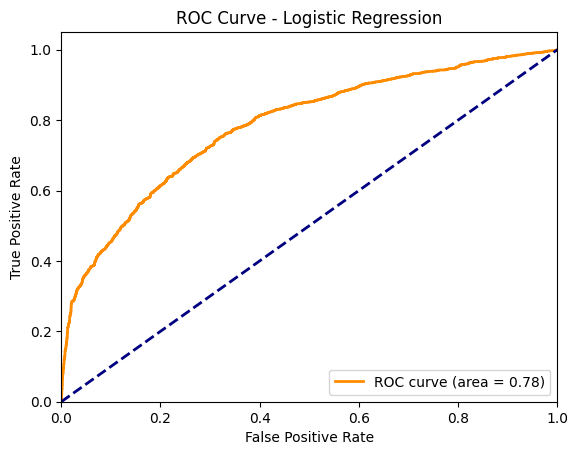

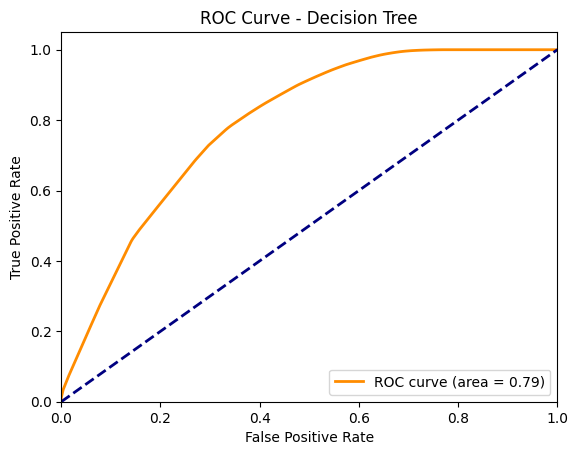

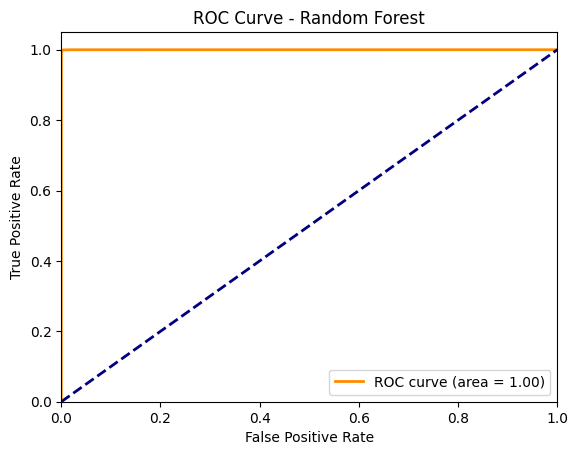

In [ ]:
def plot_roc_curve(model, X, y, model_name, feature_combo):

    # Ensure feature_combo is a list, not a tuple
    feature_combo = list(feature_combo)

    # Predict probabilities for the positive class
    y_pred_prob = model.predict_proba(X[feature_combo])[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for both models
plot_roc_curve(best_log_reg_model, X_scaled_df, y, "Logistic Regression", best_log_reg_combo)
plot_roc_curve(best_tree_model, X_scaled_df, y, "Decision Tree", best_tree_combo)
plot_roc_curve(best_rf_model, X_scaled_df, y, "Random Forest", best_rf_combo)

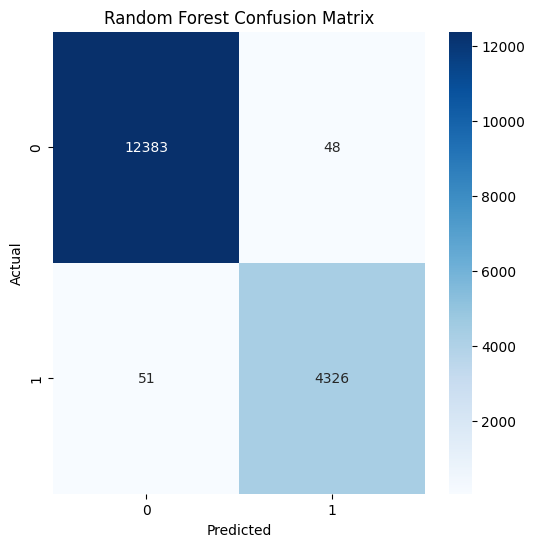

In [ ]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()